<a href="https://colab.research.google.com/github/Askoye/IP_Core_Week_8/blob/master/Moringa_IP_Week_8_Hypothyroid_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

## Context and Specifying the Question

Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Since the main purpose of thyroid hormone is to "run the body's metabolism," it is understandable that people with this condition will have symptoms associated with a slow metabolism.

Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism and is most prevalent in older women.

Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain.

Treatment consists of thyroid hormone replacement.

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

We are to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## Metric of Success

Based on all the neccesary variables,create an accurate model that shall predict whether a patient suffers from Hypothyroid or not
It will be defined by the accuracy scores and RMSE. 
A model with an accuracy above 90% will be considered a very good model.

An RMSE that is less than 10% of the mean of the target variable will be considered a very good model as well.

## Experimental Design

The following steps will be undertaken during this study:

Reading and exploring the dataset.
- Data Cleaning; 
- Dealing with outliers, anomalies and missing data to answer the given question.
- Perform univariate, bivariate analysis and multi-variate analysis and recording observations.
- Building Decision Tree models using the advanced models and optimizing them.
- Identifying which of the models used is the most effective 
- Using the mentined model to select the most important features that are impactful in prediction.
- Building SVM Models using the linear, polynomial and the radial basic function.
- Compare the model with the features selected.
- Challenge our solution and give futher information as to how we could improve the model.


# 2. Reading and exploring the dataset

In [41]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC,LinearSVC
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold
from sklearn.preprocessing import StandardScaler,robust_scale,minmax_scale
from imblearn.over_sampling import SMOTE
from collections import OrderedDict
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,r2_score,precision_score,recall_score,f1_score
import warnings
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [42]:
# Reading and Previewing the dataset.

df = pd.read_csv('hypothyroid.csv')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [43]:
# Previewing the last five rows of the dataset

df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [44]:
# Checking the dataset info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [45]:
# Checking the columns in the dataset

df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

Variable Description:

(t is true, f is false, y is yes, n is no)

*   Status : Shows whether one has hypothroidism or not.
*   Age    : Shows the age of the patients
*   Sex    : Shows the gender of the patients
* on_thyroxine - t,f
* query_on_thyroxine - t,f
* on_antithyroid_medication - t,f
* thyroid_surgery - t,f
* query_hypothyroid - t,f
* query_hyperthyroid - t,f
* pregnant - t,f
* sick - t,f
* tumor - t,f
* lithium - t,f
* goitre - t,f
* TSH_measured - y,n
* TSH - float dtype
* T3_measured - y,n
* T3 - float dtype
* TT4_measured - y, n
* TT4 - float dtype
* T4U_measured - y,n
* T4U - float dtype
* FTI_measured - y,n
* FTI - float dtype
* TBG_measured - y,n
* TBG - float dtype

In [46]:
# Checking for unique values in dataset

df.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [47]:
# Checking for null values in our dataset

df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [48]:
# Checking for duplicated rows

df.duplicated().any()

# The dataset has duplicated entries but we won't remove them since different patients may have the same information. 

True

In [49]:
# Checking the data types in the dataset

df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

# Data Cleaning

In [50]:
df.replace('?', np.nan, inplace=True)

In [51]:
# changing the the data types of the dataset
cat =['status','sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured','T4U_measured','FTI_measured','TBG_measured']
for i in df.columns:
  if i in cat:
    df[i] =df[i].astype('category')
  else:
    df[i] = pd.to_numeric(df[i])
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [52]:
# Dealing with missing values
# For age and sex, i will fill with most common age and sex respectively which use of mode
df['age'] = df['age'].fillna(df['age'].mode()[0])

df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df.isnull().sum()

status                          0
age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [53]:
# Checking where the null values lie based on whether they were measured or not

measured = ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
unit = ['TSH','T3','TT4','T4U','FTI','TBG']

for i,j in zip(measured,unit): 
  print(df.groupby(i)[j].mean())

TSH_measured
n        NaN
y    5.92318
Name: TSH, dtype: float64
T3_measured
n         NaN
y    1.939749
Name: T3, dtype: float64
TT4_measured
n       NaN
y    108.85
Name: TT4, dtype: float64
T4U_measured
n         NaN
y    0.978199
Name: T4U, dtype: float64
FTI_measured
n           NaN
y    115.397771
Name: FTI, dtype: float64
TBG_measured
n          NaN
y    31.283077
Name: TBG, dtype: float64


We discover that the null values lie when there was no specific measurement at a particular test hence we fill the null values with zero

In [54]:
# Filling the null valued that were not measured with 0
unit_df = ['TSH','T3','TT4','T4U','FTI','TBG']

for i in unit_df:
  df[i].fillna(value = 0, inplace=True)

In [55]:
# Checking whether all values are well taken care of

df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

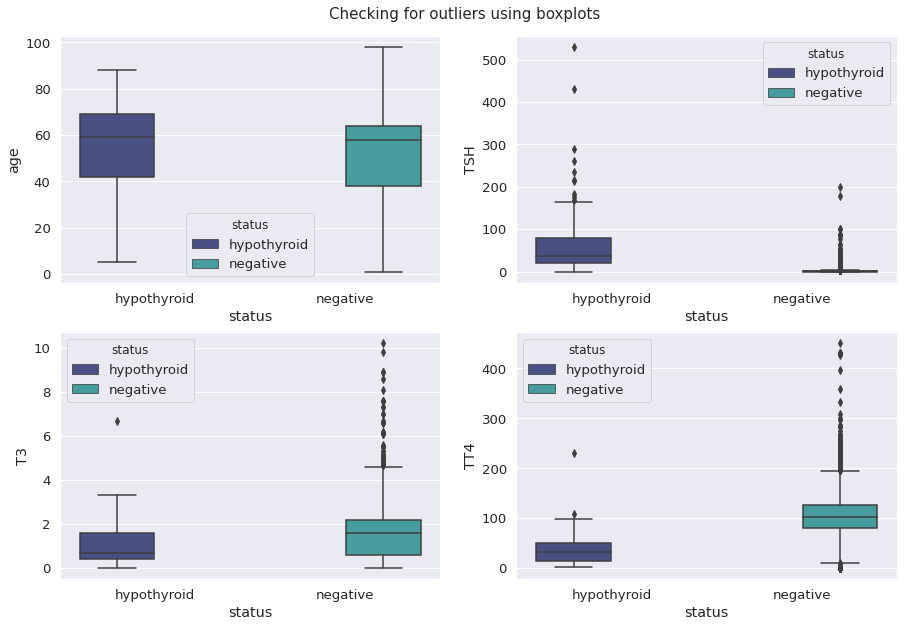

In [56]:
# Checking for outliers
numerical = ['age','TSH','T3','TT4','T4U','FTI','TBG']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92)
for ax, data, column in zip(axes.flatten(), df, numerical):
  sns.boxplot(df.status, df[column], ax = ax, hue = df.status, palette = 'mako')


The outliers look like they hold a lot of information hence we will not drop them


In [57]:
# Checking for duplicates

df.duplicated().any()

True

In [58]:
# Checking the duplicated columns

df[df.duplicated()]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69.0,F,f,f,f,f,f,f,f,f,f,f,f,y,21.0,y,0.8,y,53.0,y,0.86,y,61.0,n,0.0
66,hypothyroid,62.0,M,f,f,f,f,f,f,f,f,f,f,f,y,100.0,y,0.4,y,10.0,y,1.00,y,10.0,n,0.0
124,hypothyroid,77.0,F,f,f,f,f,f,f,f,f,f,f,f,y,23.0,y,0.5,y,33.0,y,0.67,y,49.0,n,0.0
128,hypothyroid,79.0,F,f,f,f,f,f,f,f,f,f,f,f,y,29.0,y,1.6,y,47.0,y,0.97,y,48.0,n,0.0
131,hypothyroid,50.0,F,t,f,f,f,f,f,f,f,f,f,f,y,34.0,n,0.0,y,55.0,y,0.93,y,60.0,n,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,negative,33.0,F,f,f,f,f,f,f,f,f,f,f,f,n,0.0,y,0.8,y,88.0,y,1.02,y,86.0,n,0.0
3066,negative,74.0,F,t,f,f,f,f,f,f,f,f,f,f,y,21.0,y,1.8,y,126.0,y,1.18,y,107.0,n,0.0
3071,negative,59.0,F,f,f,f,f,f,f,f,f,f,f,f,n,0.0,n,0.0,n,0.0,n,0.00,n,0.0,y,25.0
3111,negative,89.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.9,y,82.0,y,0.80,y,103.0,n,0.0


We will not remove this duplicated columns as different patients may have the same information. 

In [59]:
# Checking statistical descriptions of the dataset
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,52.260512,5.046782,1.513531,100.281031,0.901502,106.386310,2.571483
std,18.089308,22.160083,1.191836,52.588757,0.341286,65.607474,10.204298
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.500000,76.000000,0.820000,85.000000,0.000000
50%,58.000000,0.400000,1.600000,100.000000,0.940000,105.000000,0.000000
75%,64.000000,1.800000,2.200000,124.000000,1.050000,126.000000,0.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


This shows that most of the patients tested were negative of the condition while a few tested positive.

Histograms

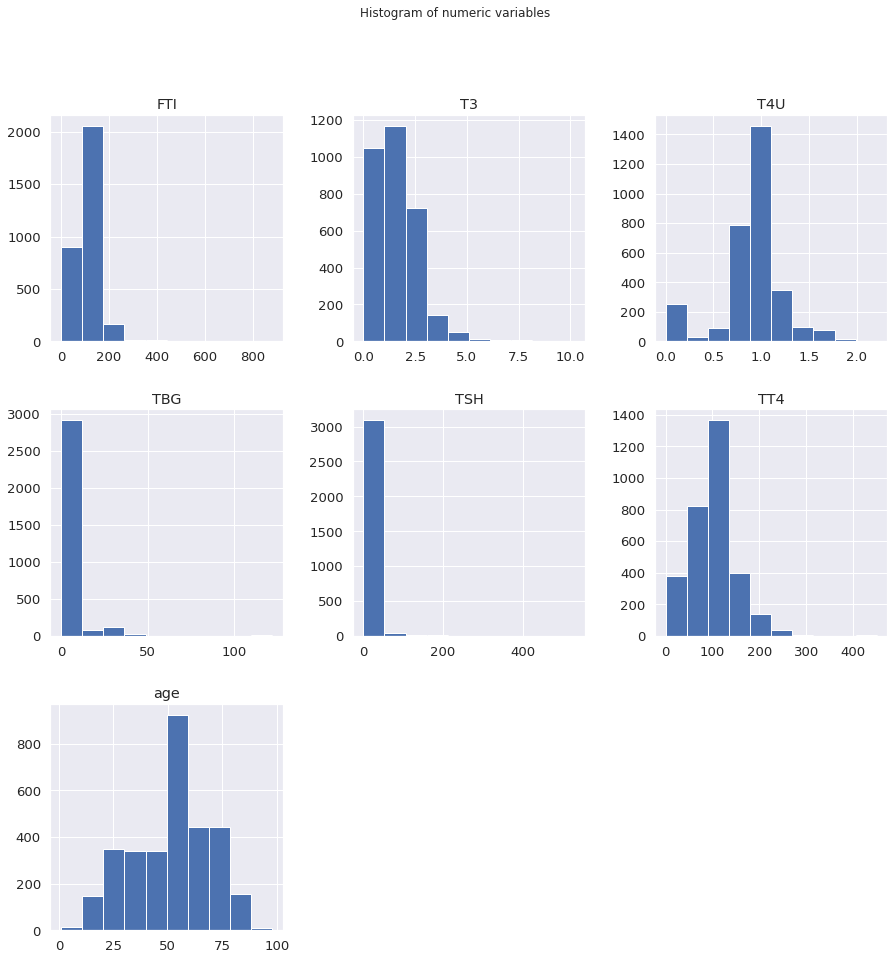

In [60]:
#Plotting the variables on histograms to view their distributions.
df.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Hypothyroid Histogram')
plt.show()

Most of the variables are positively skewed i.e. they are skewed to the right with majority of the members at the age of 60

Correlation

In [61]:
# Checking how our varibales are correlated using a matrix

corrMatrix = df.corr()
corrMatrix

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,0.011117,-0.071634,-0.005773,-0.037365,0.090593,-0.134025
TSH,0.011117,1.000000,-0.085072,-0.220293,0.095537,-0.186038,-0.052500
T3,-0.071634,-0.085072,1.000000,0.502813,0.457418,0.336268,-0.302469
TT4,-0.005773,-0.220293,0.502813,1.000000,0.599128,0.763978,-0.441062
T4U,-0.037365,0.095537,0.457418,0.599128,1.000000,0.204452,-0.618106
FTI,0.090593,-0.186038,0.336268,0.763978,0.204452,1.000000,-0.388026
TBG,-0.134025,-0.052500,-0.302469,-0.441062,-0.618106,-0.388026,1.000000


Our variables are correlated with TT4 and FTI having the highest correlation with the status of the patient.

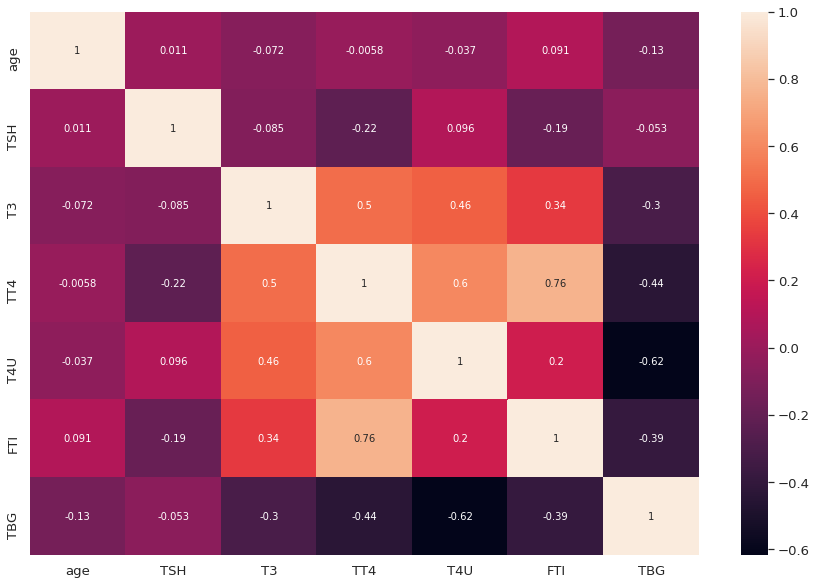

In [62]:
# Plotting visualization of the correlation matrix for better clarity 
plt.figure(figsize=(15, 10))  
sns.heatmap(corrMatrix, annot = True)

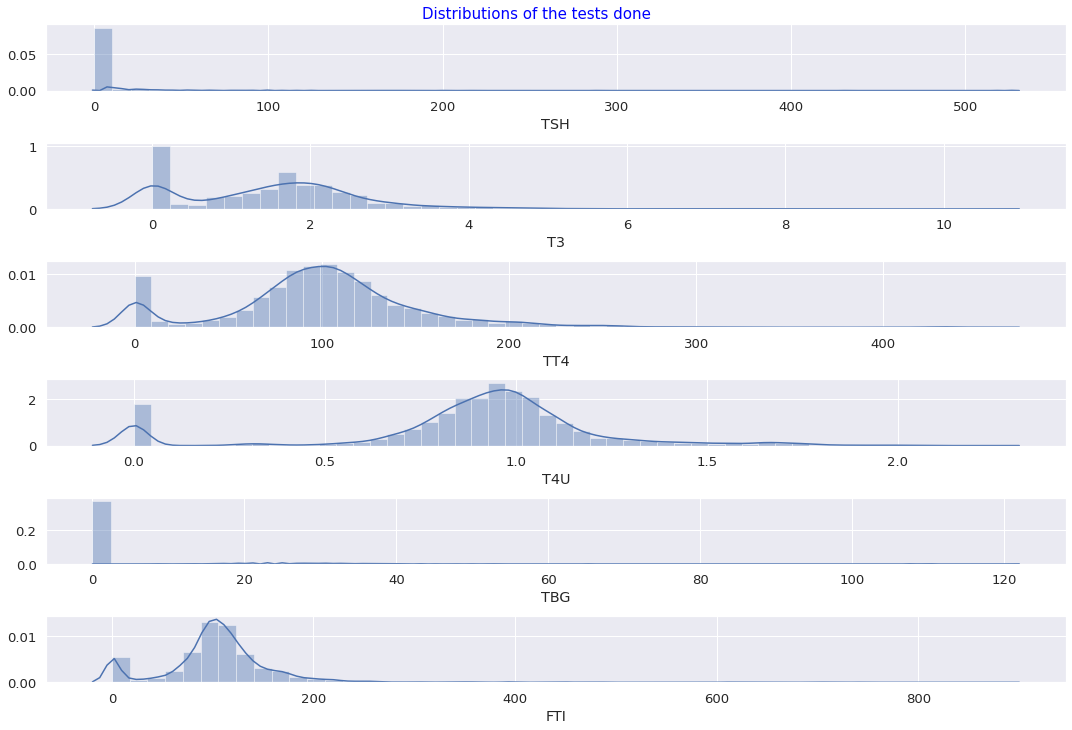

In [63]:
columns = ['TSH','T3','TT4','T4U','TBG','FTI']
sns.set_style('darkgrid')
fig, axes = plt.subplots(len(columns), figsize = (15,10))
fig.suptitle('Distributions of the tests done', y= 1.01, color = 'blue', fontsize = 15)

for ax, data, col in zip(axes.flatten(), df, columns):
  sns.distplot(df[col], ax = ax, kde = True)
plt.tight_layout()

The TBG test and the TSH test had most patients having not taken the test hence no distribution was formed.
The FTI test,The T3 test,The TT4 test and The T4U test had a bi-modal distribution with most patients having taken the test.

## Implementing the Solution

#### a.) Baseline Model

In [64]:
#Encoding categorical features using label encoder
#Importing labelencoder
from sklearn.preprocessing import LabelEncoder
#Instantiating labelencoder object
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,69,1,0,0,0,0,0,0,0,0,0,0,0,1,165,1,7,1,23,1,116,1,19,0,0
1,0,12,0,1,0,0,0,0,0,0,0,0,0,0,1,221,1,18,1,27,1,81,1,26,0,0
2,0,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,6,1,68,1,0,0,0
3,0,21,0,0,0,0,0,0,0,0,0,0,0,0,1,237,1,5,1,9,1,72,1,9,0,0
4,0,74,1,0,0,0,0,0,0,0,0,0,0,0,1,106,1,13,1,64,1,96,1,48,0,0


This model is a Multiple Linear Regression model and it's scores will be a benchmark for the other models we create.

In [65]:
#Getting the required columns from the dataset
X = df[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']].values
y = df['status'].values

#Splitting the dataset into train and test sets
#20% of the data will be used as test, the rest will be the training set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#Creating a regressor object, and train it using the train data

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
# Display the intercept / bias
print(regressor.intercept_)

# Display the coefficient
print(regressor.coef_)

1.157304315720334
[-5.07755483e-05  1.80611260e-03 -8.13487680e-03  1.52781634e-02
  4.91101776e-02 -1.75423969e-02  1.45317668e-02 -3.44050718e-02
  9.60978499e-03  6.24844087e-02  2.39756883e-02 -2.77555756e-17
 -3.42377846e-02  3.84196859e-02 -2.27962357e-03 -1.04639386e-02
  1.12216700e-03 -2.94228373e-01  2.33361735e-03  2.62040218e-01
 -2.62063101e-03 -9.17794990e-02 -1.14972338e-03 -1.49118901e-01]


In [67]:
# Feeding the model the trained data saved for testing.
y_predict = regressor.predict(X_test)

# We will have the model predict the price based on the independent variables
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

# Comparing that to the actual status from the original dataset.
comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.958926,0.947330
std,0.198619,0.146448
min,0.000000,0.294505
25%,1.000000,0.902828
50%,1.000000,0.980921
75%,1.000000,1.039020
max,1.000000,1.282034


In [68]:
# The Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

# The Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  

# The Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.10475261105258683
Mean Squared Error: 0.028290485174096602
Root Mean Squared Error: 0.1681977561505997


## Part 1: Random Forests :

Here, we will build the Random Forests Model 

* Random Forests are non parametric learning methods for classification, regression, and other tasks that operate by constructing a multitude of decision trees at training time and giving the class that is the mode of the classes(classification) or mean prediction(regression) of the individual trees.

* We'll go ahead and build the Ada Boosted tree Model, which is an approach to machine learning based on the idea of creating
a highly accurate prediction rule by combining many relatively weak and inaccurate rules. 
This is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate prediction of unusual observations.

* We'll then find out which is the most effeciant model to use which will the give us the most important features , optimize them and set hyperparameters in order to predict whether a patient's symptoms indicate that they have hypothyroidsm.


In [77]:
# Encoding the categorical columns before fitting the data into the model

df= pd.get_dummies(df, columns = ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                                 'thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick',
                                 'tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured',
                                 'FTI_measured','TBG_measured'] )


In [79]:
df.take(np.random.permutation(len(df))[:15])

,status,age,TSH,T3,TT4,T4U,FTI,TBG,sex_0,sex_1,on_thyroxine_0,on_thyroxine_1,query_on_thyroxine_0,query_on_thyroxine_1,on_antithyroid_medication_0,on_antithyroid_medication_1,thyroid_surgery_0,thyroid_surgery_1,query_hypothyroid_0,query_hypothyroid_1,query_hyperthyroid_0,query_hyperthyroid_1,pregnant_0,pregnant_1,sick_0,sick_1,tumor_0,tumor_1,lithium_0,lithium_1,goitre_0,goitre_1,TSH_measured_0,TSH_measured_1,T3_measured_0,T3_measured_1,TT4_measured_0,TT4_measured_1,T4U_measured_0,T4U_measured_1,FTI_measured_0,FTI_measured_1,TBG_measured_0,TBG_measured_1
3108,1,64,91,16,85,70,79,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
477,1,30,0,19,100,65,99,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1252,1,35,0,0,97,63,98,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0
2385,1,26,33,22,89,55,97,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
2265,1,15,0,25,99,86,81,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0
1892,1,76,49,10,109,63,110,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
3011,1,56,93,20,59,32,84,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
698,1,28,54,17,105,43,134,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
1405,1,22,35,24,125,65,125,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0
196,1,77,50,9,112,56,123,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0


In [80]:
# Selecting the target and predictor variables
X = df.drop('status', axis = 1)

y = df.status

In [81]:
# Splitting the data into train and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Modeling

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

comparison_frame.head(10)

,Actual,Predicted
321,1,1
699,1,1
1773,1,1
1293,1,1
1058,1,1
1640,1,1
2729,1,1
871,1,1
294,1,1
29,0,1


In [82]:
# Evaluating the model

# Assessing the errors
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9884088514225501


We have a 98% accuracy which is a good outcome

In [83]:
# get parameters 
forest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [84]:
# Hyperparameter tuning the RandomForestClassifier

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [40, 50, 60, 70, 80], 'min_samples_split':[2, 3, 6, 4, 5 ], 'max_depth' : [4, 5, 8, 10]}

forest = RandomForestClassifier()

search = GridSearchCV(forest, scoring = 'accuracy', param_grid=params, cv = 10)

search.fit(X, y)

search.best_params_

{'max_depth': 8, 'min_samples_split': 6, 'n_estimators': 40}

The optimal hyperparameters are :

*   The maxiumum number of levels in a tree should be 8
*   The number of features to consider at every split should be auto
*   The minimum number of samples required to split a node is 6
*   The optimal number of trees in our forest should be a 40 trees.

This will help us know the best way to make our model peform better and reduce overfitting effectively

In [85]:
# Fitting the model to best parameters obtained and observing the performance

forest = RandomForestClassifier(n_estimators = 80, criterion = 'entropy', max_depth = 10, min_samples_split = 2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)


# Evaluating the model performance
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9863013698630136


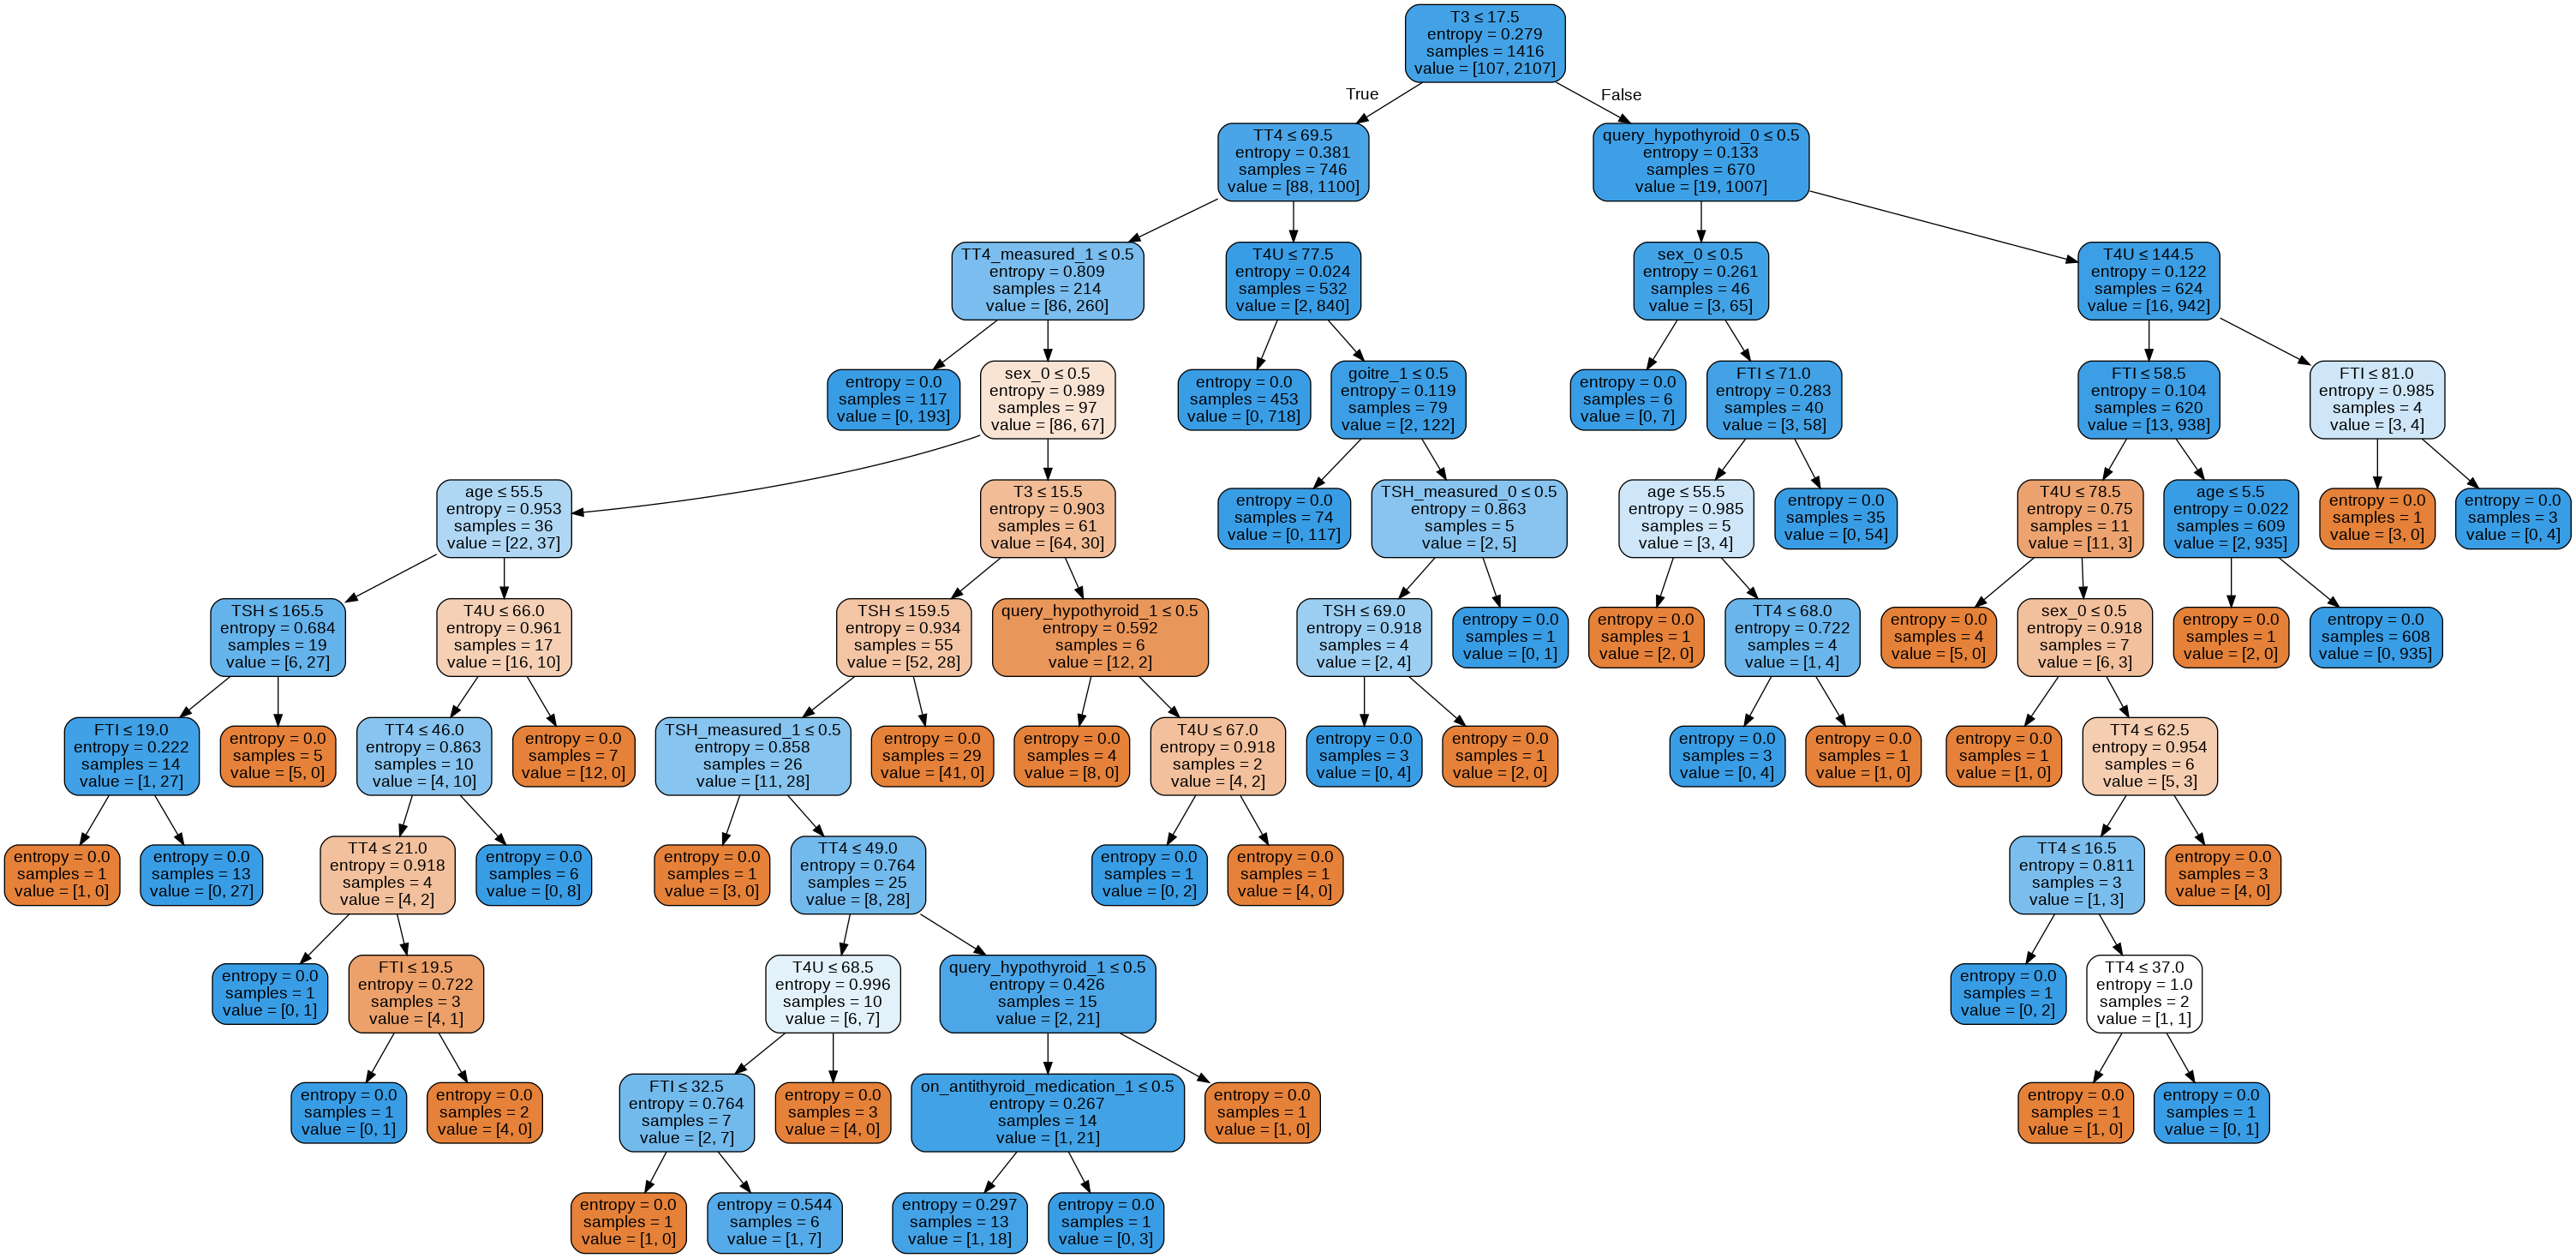

In [86]:
# Visualizing a tree from the random forest

dot_data = StringIO()

# Picking a specific tree from the forest
my_tree = forest.estimators_[2]

export_graphviz(my_tree, out_file = dot_data, filled = True, rounded = True,
              special_characters = True, feature_names = X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

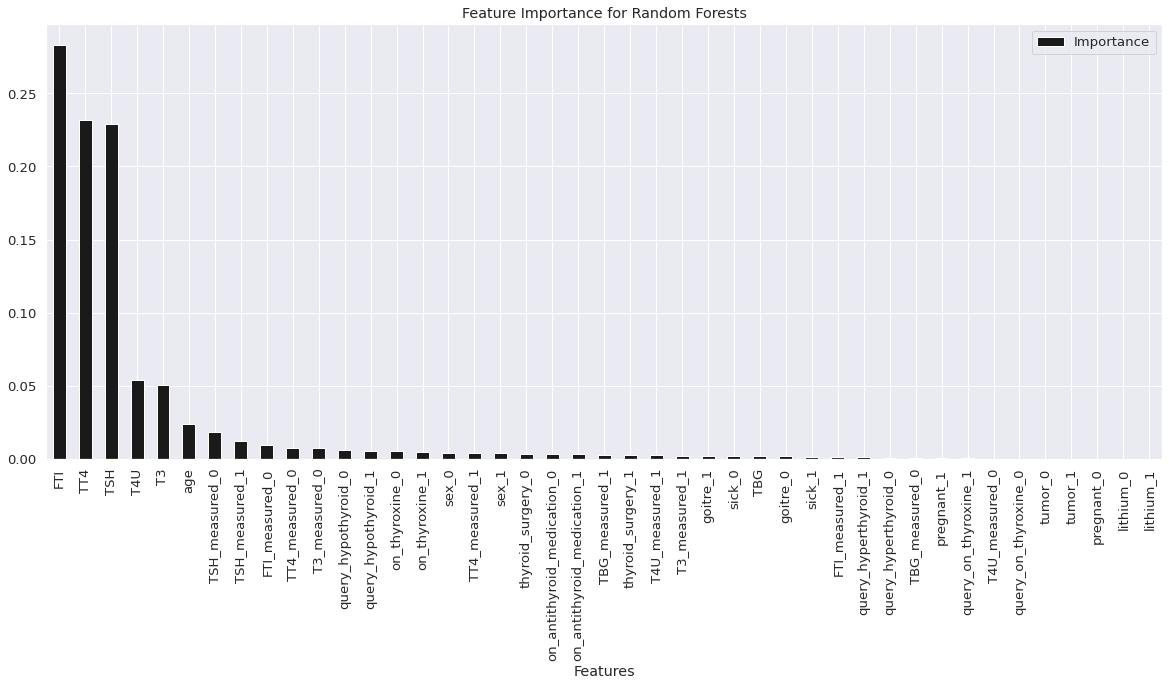

In [89]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Random Forests',figsize = (20, 8), color = 'k')
plt.show()

The important features are : 


1.   FTI
2.   TT4
3.   TSH





### AdaBoost trees

In [90]:
#Adaboost Trees

ada_boost = AdaBoostClassifier(RandomForestClassifier(max_depth = 4),
                          n_estimators=300, random_state = 0)

ada_boost = ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)

In [91]:
# Checking the accuracy of the prediction

print("Accuracy:", metrics.accuracy_score(y_test, ada_pred))

Accuracy: 0.9884088514225501


In [92]:
params = {'n_estimators' : [250, 300, 450, 500, 600]}

ada_boost = AdaBoostClassifier()

search = GridSearchCV(ada_boost, scoring = 'accuracy', param_grid = params, cv = 10)

search.fit(X, y)

search.best_params_

{'n_estimators': 300}

In [93]:
# Using the suggested estimator
ada_boost = AdaBoostClassifier(RandomForestClassifier(max_depth = 4),
                          n_estimators=250, random_state = 0)

ada_boost = ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)

In [94]:
# Checking the accuracy of the prediction

print("Accuracy:", metrics.accuracy_score(y_test, ada_pred))

Accuracy: 0.9884088514225501


**Feauture importance**

In [95]:
ada_boost.feature_importances_

array([0.0761081 , 0.16652345, 0.09368826, 0.14575569, 0.09154124,
       0.18458059, 0.00372439, 0.00942436, 0.01192351, 0.01749538,
       0.0188149 , 0.00022952, 0.00041489, 0.01665205, 0.01722183,
       0.01844763, 0.01432372, 0.01486675, 0.01911662, 0.00133446,
       0.00140645, 0.00099769, 0.00108964, 0.00281309, 0.00225095,
       0.00040907, 0.00042402, 0.00030746, 0.00025628, 0.00410091,
       0.00363273, 0.01340449, 0.01164936, 0.00788386, 0.00868989,
       0.0031367 , 0.00183083, 0.00180946, 0.00213103, 0.00242742,
       0.00158203, 0.0040025 , 0.00157674])

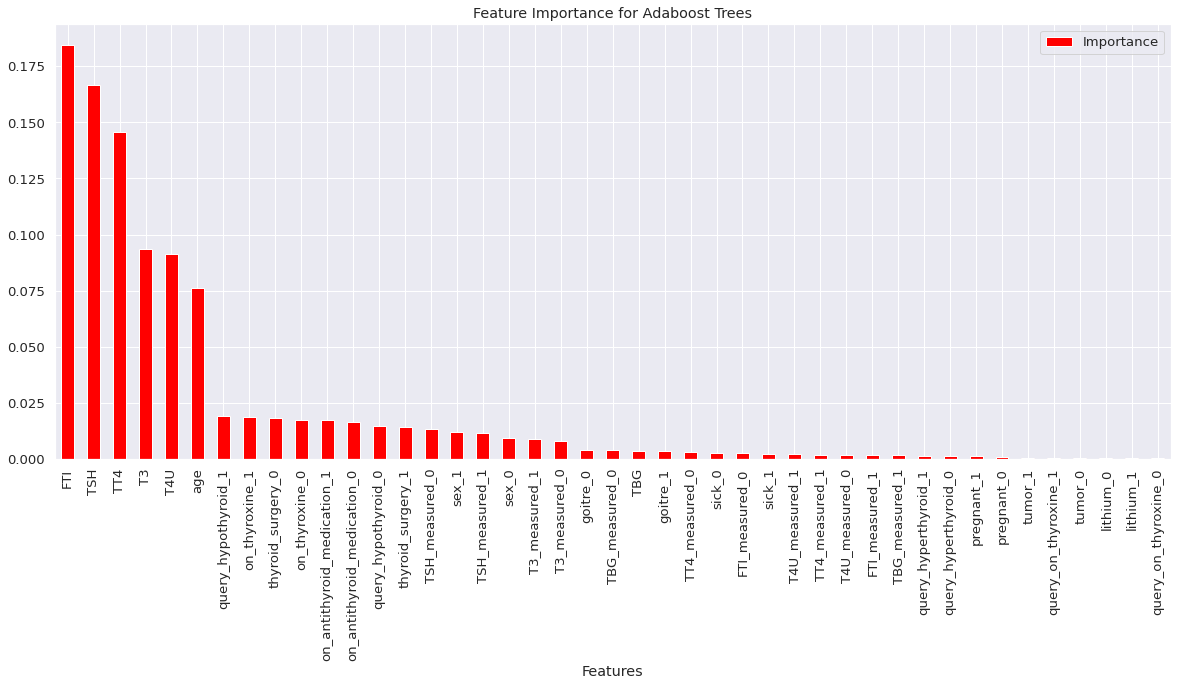

In [96]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : ada_boost.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Adaboost Trees',figsize = (20, 8), color = 'red')
plt.show()

The important features are : 


1.   FTI
2.   TT4
3.   TSH


## Support Vector Machine (svm)

In [99]:
# Selecting the independent variables and the target variable
#
X = df[['FTI', 'TSH']]
y = df['status']


# Defining the various SVM models to use for classification

pol = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names

model = [pol, linear, rbf]
names = ['Polynomial', 'Linear', 'RBF']


# Creating a function that will fit the data and train it, predict using the test features and give an accuracy score for each model
# We will pass the model, the independent and dependent variables as our function parameters

def SVM(model, X, y):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # Splitting the data into training and testing sets
  sc = StandardScaler()  # Standardising our data
  
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  model.fit(X_train, y_train) # Training the model and making predictions
  
  y_pred = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)# Evaluating the model performance
  
  return accuracy, model      # Promting the function to return the accuracy and the model name


for model, name in zip(model, names):
  print(f'The accuracy of {name:<10} is: {SVM(model, X, y)[0]}')

The accuracy of Polynomial is: 0.982086406743941
The accuracy of Linear     is: 0.9789251844046365
The accuracy of RBF        is: 0.9841938883034773


We found out that out of the Three models used, The Rbf model had the highest accuracy among them followed by Polynomial then Linear

# Challenging the solution

I am going to use xgboost insead of svm and randomforest to see whether there is change in perfomance

In [100]:
# Splitting the dataset into target and feature set
# Making categorical data into dummies

x = df.drop('status',axis=1)
X = pd.get_dummies(x)

y = df['status']
y =pd.get_dummies(y,drop_first=True)


sm = SMOTE()
X, y = sm.fit_sample(X, y)

# splitting the dataset to train set and test set

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
# Implementing Standard Scaler to nomalize the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

xg = XGBClassifier()
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)

print('RMSE:', metrics.mean_squared_error(y_test,y_pred))
print("accuracy_score",accuracy_score(y_test,y_pred))

RMSE: 0.00995850622406639
accuracy_score 0.9900414937759336


XGBoost proved to have higher perfomance and accuracy compared to other models used above